## Accenture Simulation Project

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
content = pd.read_csv('Content.csv')

In [102]:
content.head()

,Content Type,Category
Content ID,,
97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [6]:
content.set_index('Content ID', inplace=True)#.drop(columns=['Unnamed', 'URL'], inplace=True)
# 不分开写会报错 AttributeError: 'NoneType' object has no attribute 'drop'

In [7]:
content.drop(columns=['Unnamed: 0', 'URL', 'User ID'], inplace=True)

In [8]:
content.dropna(inplace=True)
content.rename(columns={'Type': 'Content Type'}, inplace= True)

In [9]:
content['Category']=content['Category'].str.replace('"', '')

In [10]:
reactions = pd.read_csv('Reactions.csv')

In [103]:
reactions.head()

,Type,Datetime
Content ID,,
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [12]:
reactions.drop(['Unnamed: 0', 'User ID'], axis=1, inplace=True)
reactions.set_index('Content ID', inplace=True)

In [13]:
reactions.dropna(inplace=True)

In [14]:
reactiontypes = pd.read_csv('ReactionTypes.csv')

In [104]:
reactiontypes.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [16]:
reactiontypes.drop(columns=['Unnamed: 0'], inplace= True)
reactiontypes.set_index('Type')

,Sentiment,Score
Type,,
heart,positive,60
want,positive,70
disgust,negative,0
hate,negative,5
interested,positive,30
indifferent,neutral,20
love,positive,65
super love,positive,75
cherish,positive,70


In [17]:
reactiontypes.dropna(inplace=True)

In [111]:
# content.merge(reactions, on='Content ID')；

In [187]:
results = content.merge(reactions, on='Content ID').reset_index().merge(reactiontypes, on='Type')
results['Category']= results['Category'].str.lower()
# 如果不reset_index,content Id字段就会消失不见
display(results.head())
display(results.shape)

,Content ID,Content Type,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0


(24573, 7)

In [188]:
results.to_excel('results.xlsx')

In [191]:
aggregate = results.groupby('Category')['Score'].sum(). sort_values(ascending=False)

In [192]:
top5 = aggregate[:5]

In [193]:
top5

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

In [195]:
with pd.ExcelWriter('top5category.xlsx') as writer:
    results.to_excel(writer, sheet_name='Cleaned Table')
    aggregate.to_excel(writer, sheet_name='Aggregate Score')
    top5.to_excel(writer, sheet_name='Top 5 Categories')

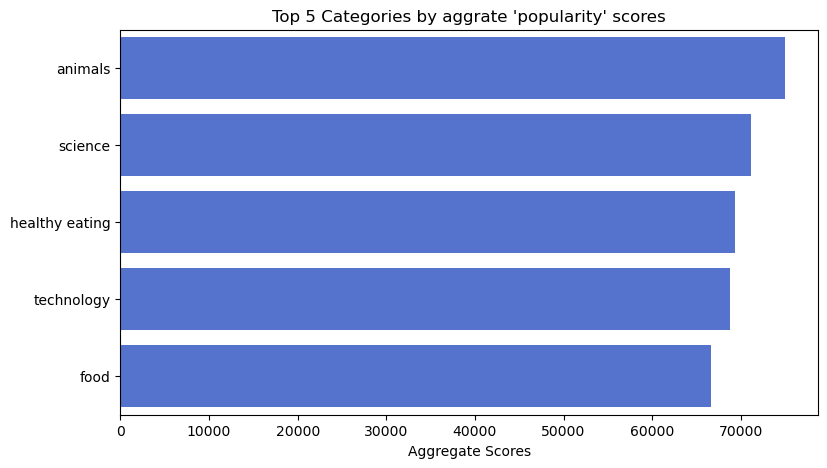

In [196]:
plt.figure(figsize=(9, 5))
sns.barplot(y=top5.index, x=top5.values, color=(65/255, 105/255, 225/255));# 注意这里不能用countplot因为数据已经汇总好了
plt.xlabel('Aggregate Scores')
plt.ylabel('')
plt.title("Top 5 Categories by aggrate 'popularity' scores")
plt.savefig("Top 5 Categories by aggrate 'popularity' scores");

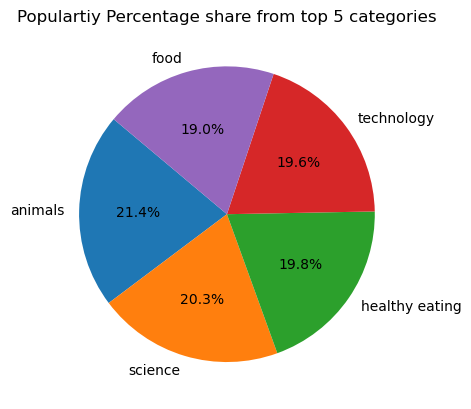

In [197]:
plt.pie(top5, labels=top5.index,autopct='%1.1f%%', startangle=140)
plt.title('Populartiy Percentage share from top 5 categories')
plt.savefig('Populartiy Percentage share from top 5 categories');

In [198]:
mostPopularCategory=results[results['Category']=='animals'].groupby('Type')['Type'].count()

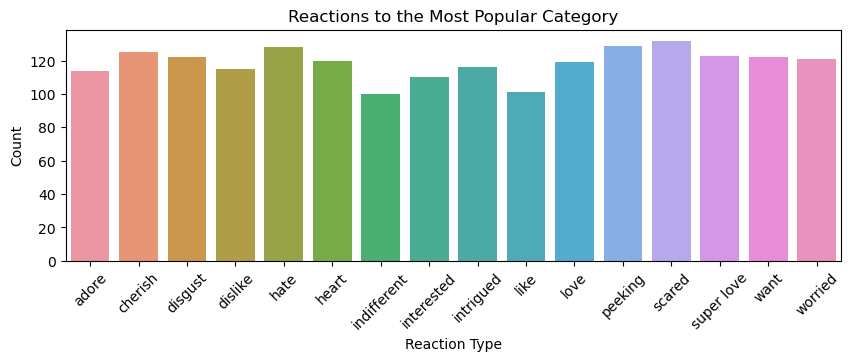

In [199]:
plt.figure(figsize=(10, 3))
sns.barplot(x=mostPopularCategory.index, y=mostPopularCategory.values);
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45);
plt.title('Reactions to the Most Popular Category')
plt.savefig('Reactions to the Most Popular Category');

In [200]:
type(results['Datetime'].str.slice(5,7))

pandas.core.series.Series

In [201]:
results.shape

(24573, 7)

In [202]:
results_month=results.groupby([results['Datetime'].str.slice(5,7),'Content ID'])['Content ID'].count()
display(type(results_month))
display(results_month.head())

pandas.core.series.Series

Datetime  Content ID                          
01        00d0cdf9-5919-4102-bf84-ebde253c3cd2    3
          01396602-c759-4a17-90f0-8f9b3ca11b30    3
          019b61f4-926c-438e-adaf-6119c5eab752    1
          01aff5ec-2aa8-412e-99ec-526f0f9a6d5e    5
          02664d35-87cf-46a6-a80b-78fbc9ac8b2f    2
Name: Content ID, dtype: int64

In [134]:
# results_month.reset_index() 不懂ValueError: cannot insert Content ID, already exists

In [203]:
post_by_month = results_month.groupby('Datetime').count()
post_by_month

Datetime
01    781
02    755
03    753
04    736
05    759
06    762
07    778
08    773
09    754
10    771
11    768
12    756
Name: Content ID, dtype: int64

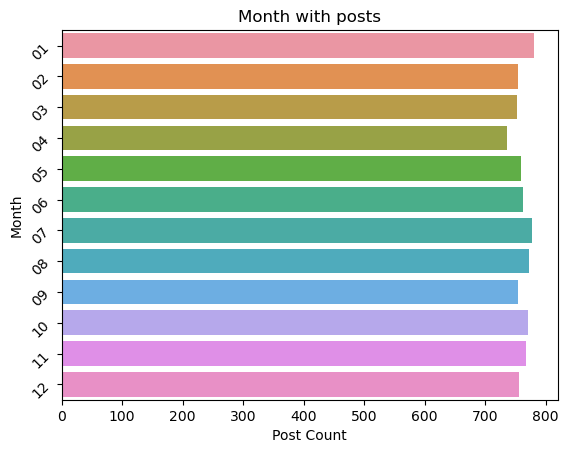

In [205]:
# plt.figure(figsize=(10, 3))
sns.barplot(y=post_by_month.index, x=post_by_month.values)
plt.ylabel('Month')
plt.xlabel('Post Count')
plt.title('Month with posts')
plt.yticks(rotation=45);
plt.savefig('Month with posts');